# Исследовательский анализ

## Необходимые модули

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

## Вспомогательные методы

In [2]:
def display_QQ_and_histogramm(data, variable_name, ax_hist, ax_qq, ax_boxplot):
    ax_hist.hist(data[variable_name])
    ax_hist.set_title(variable_name)
    ax_hist.set_ylabel('frequency')
    stats.probplot(data[variable_name], plot=ax_qq)
    ax_qq.set_title('QQ-plot for ' + variable_name + "\n Shapiro: p-value=" + \
                    str(round(stats.shapiro(data_frame[variable_name])[1], 4)))
    ax_boxplot.boxplot(data[variable_name])
    ax_boxplot.set_title(variable_name)

## О данных

№| Name | Type | Description
:-|:-----|:------|:------------
1|School|discrete|contains the name of each school
2|School_Type|binary|can be equal to either **Lib Arts** (stands for liberal arts) or **Univ** (stands for university)
3|SAT|continuous|Median combined Math and Verbal SAT score of students
4|Acceptance|continuous|% of applicants accepted
5|$/Student|continuous|Money spent per student in dollars
6|Top 10%|continuous|% of students in the top 10% of their h.s. graduating class
7|%PhD|continuous|% of faculty at the institution that have PhD degrees
8|Grad%|continuous|% of students at institution who eventually graduate

## Загрузка набора данных

In [3]:
data_frame = pd.read_csv("data_frame.csv", sep='\t')

In [4]:
data_frame.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


## Поиск пропусков в данных

Здесь мы попробуем обнаружить пропуски в наборе данных с тем, чтобы убедиться, что пропусков нет и можно дальше работать или они есть и тогда надо их как-то заполнять:

In [5]:
data_frame.isnull().any()

School         False
School_Type    False
SAT            False
Acceptance     False
$/Student      False
Top 10%        False
%PhD           False
Grad%          False
dtype: bool

Пропусков в данных нет, это здорово, поскольку в случае их присутствия мы были бы вынуждены как-то их заполнять (копирование значений признаков из наиболее похожих объектов, удаление строк с пропусками, EM-алгоритм и т.д.). Подобные манипуляции, насколько хороши бы они ни были, тем не менее смещают статистики, что безусловно, нехорошо.

## Расширение набора описательных статистик

Добавим также вариационный размах с тем, чтобы первичное представление о данных было более полным:

In [6]:
data_frame_description = data_frame.describe()
v_range  = pd.Series(data=(data_frame_description.loc['max'] - data_frame_description.loc['min']), name='range')
data_frame_description = data_frame_description.append(v_range)
data_frame_description

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000
range,291.000000,50.000000,84742.000000,51.000000,42.000000,34.000000


## Вывод первоначальных графиков

Одним из ключевых предположений при использовании параметрических критериев (f-критерий, t-критерий) является нормальность выборок. Следующий фрагмент кода выводит гистограммы, quantile-quantile графики, а так же box-plot графики с тем, чтобы составить первое представление о том, насколько выборки удовлетворяют требование нормальности. Здесь также расчитывается критерий Шапиро-Уилка с тем, чтобы численно оценить предположение о нормальности.

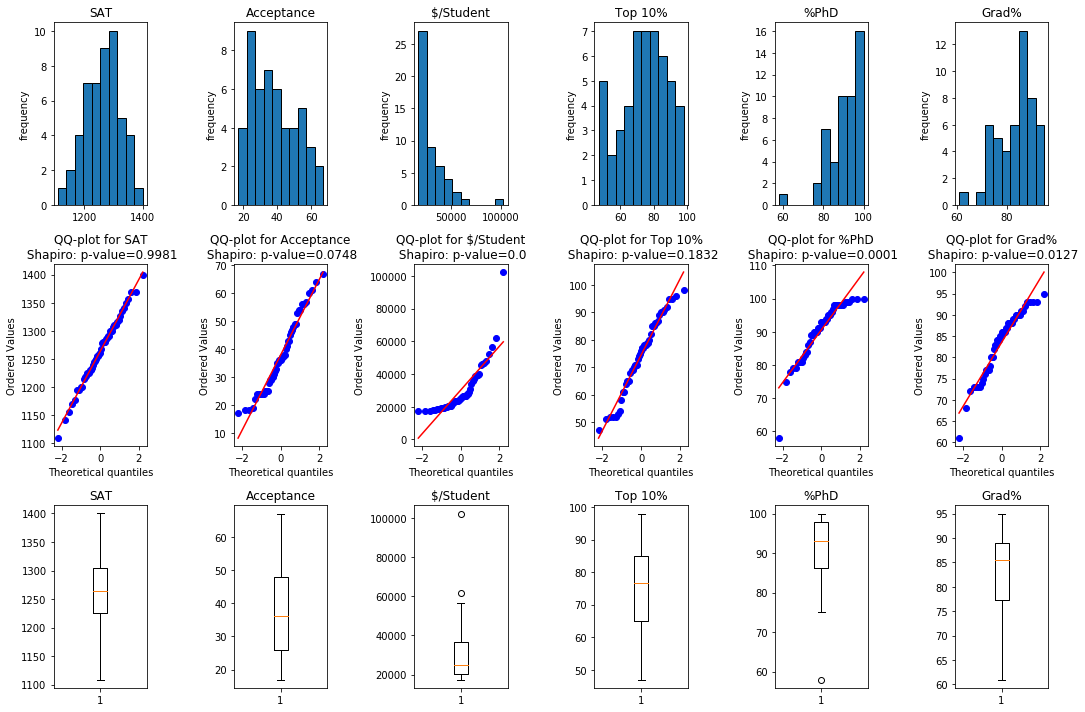

In [8]:
plt.rcParams["patch.force_edgecolor"] = True
f, axarr = plt.subplots(3, 6, figsize=(15,10))
for i in range(2, len(data_frame.columns)):
    display_QQ_and_histogramm(data_frame, data_frame.columns[i], axarr[0, i - 2], axarr[1, i - 2], axarr[2, i - 2])
plt.tight_layout()
plt.show()

Как видно из QQ-графиков, признаки SAT, Acceptance, Top 10% имеют распределение, достаточно близкое к нормальному. Это также подтверждается количественно (достигаемый уровень значимости для данных признаков превышает 0.05, следовательно у нас нет достаточных оснований отвергнуть нулевую гипотезу о нормальном распределении). Остальные же графики имеют сильную асимметрию и кроме того содержат выбросы, что, конечно же, также сказывается на оценке их нормальности.

Следующая серия графиков позволяет визуально оценить наличие связи между парами признаков.

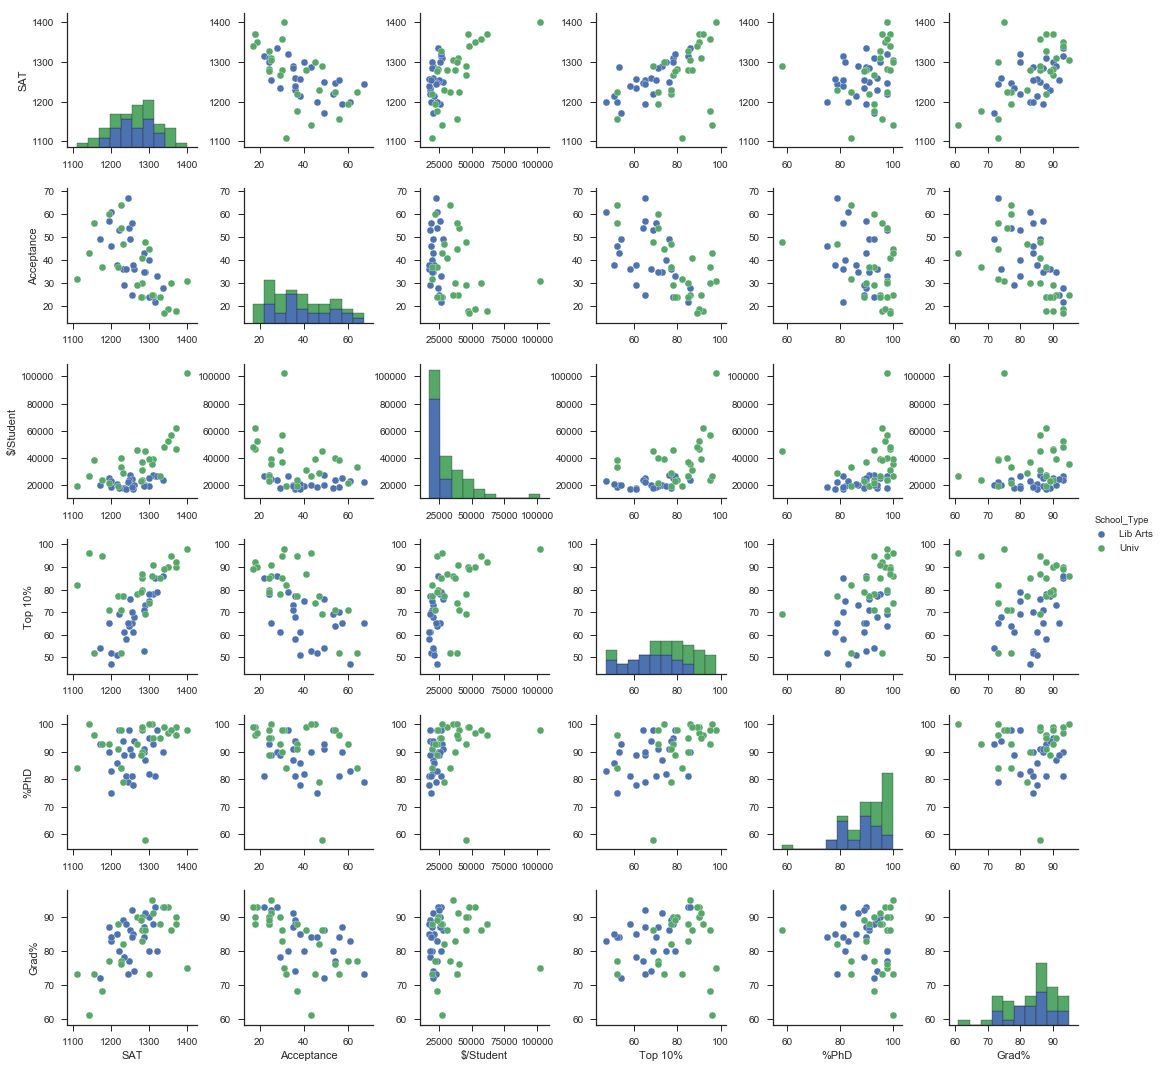

In [155]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_frame, hue='School_Type')

Достаточно сильная положительная связь присутствует между признаками Top 10% и Student, SAT и Grad%, SAT и Student, Top 10% и SAT. Так же сильная отрицательная связь присутствует между признаками Acceptance и SAT, Acceptance и Top 10%, Acceptance и Grad%. Причинно-следственные связи здесь, конечно, рано искать, однако некоторые выводы можно сделать. В целом достаточно очевидный вывод о том, что в учебных заведениях, где студенты более склонны к критическому мышлению (SAT), будут выше показатели по, скажем, проценту студентов, которые в конечном итоге доведут обучение до конца (Grad%). Также, например, достаточно просто объяснить связь между процентом принятых заявлений на поступление (Acceptance) и склонностью к критическому мышлению. Чем больше заявок мы удовлетворяем, тем, соответственно, ниже порог вхождения, следовательно, мы можем принять абитуриентов, которые не особо рвутся все проверять. Чем мы строже относимся к отбору, тем, соответственно, выше шанс, что пройдут те люди, которые максимально нацелены на анализ поступающей им информации, проверку этой информации и т.д. и т.п.

№| Name | Type | Description
:-|:-----|:------|:------------
1|School|discrete|contains the name of each school
2|School_Type|binary|can be equal to either **Lib Arts** (stands for liberal arts) or **Univ** (stands for university)
3|SAT|continuous|Median combined Math and Verbal SAT score of students
4|Acceptance|continuous|% of applicants accepted
5|$/Student|continuous|Money spent per student in dollars
6|Top 10%|continuous|% of students in the top 10% of their h.s. graduating class
7|%PhD|continuous|% of faculty at the institution that have PhD degrees
8|Grad%|continuous|% of students at institution who eventually graduate

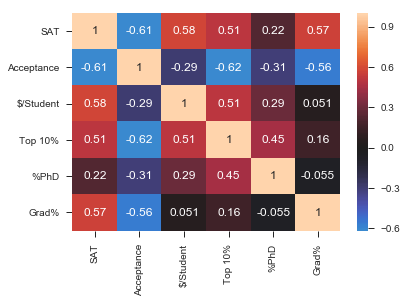

In [156]:
sns.heatmap(data_frame.loc[:, ['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']].corr(), center=0, annot=True)